In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
!ls

Checker.ipynb                answer_1.txt
HW_1.ipynb                   answer_2.csv
HW_test_additional_data.csv  catboost_info
HW_test_main_data.csv        checker.py
HW_train_additional_data.csv file_1.txt
HW_train_main_data.csv       file_11.txt
Untitled.ipynb               file_2.csv
Untitled1.ipynb              test_answer_1.txt


In [4]:
file_1 = open('file_1.txt','w')

In [3]:
# 1. Найти "id" топ 10 самых дорогих квартир
train_df = pd.read_csv('HW_train_main_data.csv')

In [4]:
test_df = pd.read_csv('HW_test_main_data.csv')

In [134]:
test_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,timestamp_int,ratio_life_dash_full_sq,ration_kitchen_dash_full_sq,age,some_extra_sqr_1,some_extra_sqr_2,pred_price,pred_price_2,combine_2_models,pred_price_3
0,30307,2014-04-20,74,43.0,13.0,14.0,1.0,1996.0,3.0,10.0,...,1397952000000000000,0.581081,0.135135,-18.0,31.0,31.0,9596629.00,10110110.0,9956066.00,10283268.0
1,87380,2015-01-17,29,-20.0,6.0,17.0,1.0,-20.0,1.0,1.0,...,1421452800000000000,-0.689655,0.034483,-2035.0,49.0,49.0,2757307.25,2684473.0,2706323.25,2955620.0
2,12874,2014-07-08,80,-20.0,8.0,17.0,1.0,-20.0,3.0,1.0,...,1404777600000000000,-0.250000,0.012500,-2034.0,100.0,100.0,8762424.00,8780698.0,8775216.00,8642056.0
3,57688,2013-01-15,53,-20.0,4.0,-20.0,-20.0,-20.0,-20.0,-20.0,...,1358208000000000000,-0.377358,-0.377358,-2033.0,73.0,73.0,5272009.00,6176990.5,5905496.00,5264357.0
4,43433,2012-06-15,36,19.0,16.0,-20.0,-20.0,-20.0,-20.0,-20.0,...,1339718400000000000,0.527778,-0.555556,-2032.0,17.0,17.0,5907185.00,5242674.5,5442027.50,6116692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28684,2015-04-05,54,-20.0,2.0,17.0,1.0,-20.0,2.0,1.0,...,1428192000000000000,-0.370370,0.018519,-2035.0,74.0,74.0,4020712.50,4062085.0,4049673.25,3749988.5
996,65212,2014-05-22,78,45.0,5.0,10.0,1.0,1995.0,3.0,10.0,...,1400716800000000000,0.576923,0.128205,-19.0,33.0,33.0,10998684.00,10255977.0,10478789.00,10858027.0
997,11218,2014-12-18,2,1.0,26.0,1.0,1.0,1.0,1.0,1.0,...,1418860800000000000,0.500000,0.500000,-2013.0,1.0,1.0,14186800.00,12209163.0,12802454.00,12735337.0
998,57238,2013-06-09,55,33.0,6.0,-20.0,-20.0,-20.0,-20.0,-20.0,...,1370736000000000000,0.600000,-0.363636,-2033.0,22.0,22.0,6996453.00,7666872.5,7465746.50,6467585.0


In [8]:
list_a = train_df.sort_values('price',ascending=False).head(10).id.values.tolist()

In [36]:
','.join(str(i) for i in list_a)

'85073,14154,88100,78059,91175,45584,95572,63901,92747,40136'

In [10]:
file_1.write(str(list_a) + '\n')

71

In [5]:
# 2. Построить зависимость средней стоимости квартиры от года и месяца продаж
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['month_year'] = train_df['month'].astype(str) + '_' + train_df['year'].astype(str)

In [6]:
aggr_1 = train_df.sort_values(['year','month']).groupby(['year','month']).price.mean().reset_index()

In [7]:
aggr_1['year_month'] = aggr_1['year'].astype(str) +'_'+ aggr_1['month'].astype(str)

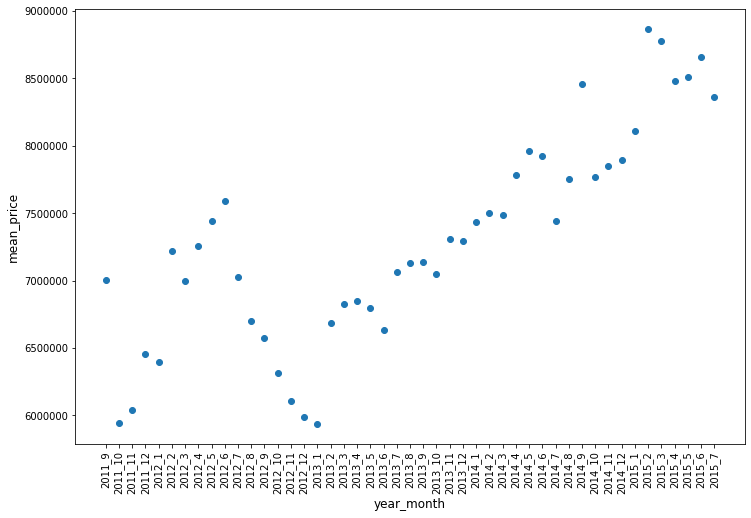

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(x='year_month', y='price', data=aggr_1)
plt.ylabel('mean_price', fontsize=12)
plt.xlabel('year_month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
answers_tt['period_flag'] = 9

answers_tt.loc[answers_tt['timestamp'] < pd.to_datetime('2012-03-01'), 'period_flag'] = 1
answers_tt.loc[(answers_tt['timestamp']>=pd.to_datetime('2012-03-01')) &
               (answers_tt['timestamp'] <pd.to_datetime('2012-10-01')), 'period_flag'] = 2
answers_tt.loc[(answers_tt['timestamp']>=pd.to_datetime('2012-10-01')) &
               (answers_tt['timestamp'] <pd.to_datetime('2013-03-01')), 'period_flag'] = 3
answers_tt.loc[(answers_tt['timestamp']>=pd.to_datetime('2013-03-01')) &
               (answers_tt['timestamp'] <pd.to_datetime('2013-07-01')), 'period_flag'] = 4 
answers_tt.loc[(answers_tt['timestamp']>=pd.to_datetime('2013-07-01')) &
               (answers_tt['timestamp'] <pd.to_datetime('2014-01-01')), 'period_flag'] = 5 
answers_tt.loc[(answers_tt['timestamp']>=pd.to_datetime('2014-01-01')) &
               (answers_tt['timestamp'] <pd.to_datetime('2014-04-01')), 'period_flag'] = 6 
answers_tt.loc[(answers_tt['timestamp']>=pd.to_datetime('2014-04-01')) &
               (answers_tt['timestamp'] <pd.to_datetime('2014-08-01')), 'period_flag'] = 7 
answers_tt.loc[(answers_tt['timestamp']>=pd.to_datetime('2014-08-01')) &
               (answers_tt['timestamp'] <pd.to_datetime('2015-02-01')), 'period_flag'] = 8 

In [15]:
# 3 Для каждой пары месяц-год  найдите индексы самых дорогих квартир, сохраните отдельный список

In [16]:
train_df.groupby(['year', 'month'])['price'].max().reset_index()\
.merge(train_df, how='left', on=['year', 'month','price'])\
[['year','month', 'price','id']].id.values.tolist()

[93255,
 39837,
 33763,
 42921,
 86122,
 59279,
 84792,
 80442,
 85073,
 53400,
 80358,
 38059,
 35501,
 45584,
 38931,
 18753,
 20881,
 63901,
 78059,
 38846,
 14154,
 84443,
 42092,
 59134,
 60348,
 85298,
 18085,
 20432,
 55606,
 98631,
 68847,
 43686,
 58882,
 91175,
 49814,
 73610,
 34194,
 75296,
 56862,
 95044,
 53674,
 95572,
 88100,
 67613,
 40136,
 72354,
 45373]

In [17]:
file_1.write(str(train_df.groupby(['year', 'month'])['price'].max().reset_index()\
.merge(train_df, how='left', on=['year', 'month','price'])\
[['year','month', 'price','id']].id.values.tolist())+ '\n')

330

In [11]:
#idmax_per_yearmonth = train_df.groupby(['year', 'month'])['price'].idxmax().values

In [12]:
# 4 Постройте boxplot для цены для пар месяц-год 

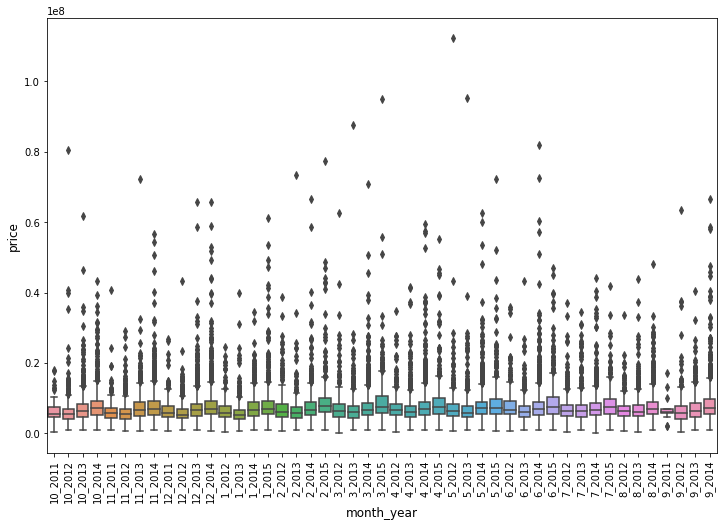

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month_year', y='price', data=train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('month_year', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
# 5 Найдите "id" 5 самых больших квартир
big_sq_ind = train_df.sort_values('full_sq',ascending=False).head(5).id.values
file_1.write(str(big_sq_ind.tolist())+ '\n')

36

In [26]:
# 6 Посчитайте кол-во пропусков в life_sq, сохраните это число, и отдельно "id" всех строк с пропусками в поле life_sq
life_sq_null_sum = train_df.life_sq.isnull().sum()
life_sq_ids = train_df[train_df.life_sq.isnull()]['id'].values

In [107]:
file_1.write(str(life_sq_ids.tolist())+ '\n')

42456

In [21]:
# 7 Предложите вариант как можно заполнить пропуски в life_sq

In [9]:
# как вариант можно построить KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
clf = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance']}
grcv = GridSearchCV(clf, params, n_jobs=-1)
grcv.fit(train_df[~train_df.life_sq.isnull()].full_sq.values.reshape(-1,1)
         , train_df[~train_df.life_sq.isnull()].life_sq.values.reshape(-1,1))
no_life_sq = grcv.predict(train_df[train_df.life_sq.isnull()].full_sq.values.reshape(-1,1))

In [10]:
grcv.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [11]:
train_df['pred_life_sq'] = np.NaN
train_df.loc[train_df.life_sq.isnull(),'pred_life_sq'] = list(no_life_sq.reshape(1,-1)[0])

In [12]:
# 8 Сохраните коффициент корреляции Пирсона между price и full_sq, и price и *life_sq*
# где *life_sq* - скорректированное значение life_sq после заполнения пропусков
print(np.corrcoef(train_df.full_sq,train_df.price)[0][1])
print(np.corrcoef(train_df.price, train_df.life_sq.combine_first(train_df.pred_life_sq))[0][1])

0.33711308742057877
0.4185643954042566


In [26]:
file_1.write(str([np.corrcoef(train_df.full_sq,train_df.price)[0][1], np.corrcoef(train_df.price, train_df.life_sq.combine_first(train_df.pred_life_sq))[0][1]])+ '\n')

41

In [27]:
file_1.close()

In [32]:
# 8 Добавьте дополнительные данные. Заполните пропуски в данных, сгенерируйте новые данные из существующих
# 9 Создайте модель для предсказания цен квартир
# 10 Посмотрите на важность признаков 
# 11 Создайте предсказание для тестовой выборки
# 12 Подготовьте 2 итоговых файла

### Первый итоговый файл должен выглядить следующим образом: 
"id" топ 10 самых дорогих квартир
индексы самых дорогих квартир, сохраните отдельный список
"id" 5 самых больших квартир
коффициент корреляции Пирсона между price и full_sq, и price и *life_sq*

### Второй итоговый файл должен выглядить следующим образом: 
id, predicted_price для тестовых данных

In [14]:
# Prepare data
add_df = pd.read_csv('HW_train_additional_data.csv')
add_test_df = pd.read_csv('HW_test_additional_data.csv')
test_df = pd.read_csv('HW_test_main_data.csv')

In [15]:
train_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,year,month,month_year,pred_life_sq
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0,2014,12,12_2014,NaN
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0,2013,6,6_2013,NaN
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0,2013,9,9_2013,NaN
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0,2013,12,12_2013,NaN
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0,2014,2,2_2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,85589,2013-05-08,58,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,101,4330300.0,2013,5,5_2013,38.1
28996,11345,2014-04-12,38,NaN,9.0,17.0,1.0,NaN,1.0,1.0,NaN,134,4779900.0,2014,4,4_2014,22.7
28997,55519,2013-09-23,55,30.0,9.0,16.0,1.0,2002.0,2.0,8.0,3.0,38,7260000.0,2013,9,9_2013,NaN
28998,17196,2013-11-19,37,19.0,3.0,16.0,5.0,1979.0,1.0,9.0,3.0,43,6018000.0,2013,11,11_2013,NaN


In [16]:
train_df = train_df.merge(add_df, how= 'left', on='id')
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_no_life_sq = grcv.predict(test_df[test_df.life_sq.isnull()].full_sq.values.reshape(-1,1))
test_df['pred_life_sq'] = np.NaN
test_df.loc[test_df.life_sq.isnull(),'pred_life_sq'] = list(test_no_life_sq.reshape(1,-1)[0])
test_df = test_df.merge(add_test_df,how='left',on='id')

In [17]:
train_df = train_df.fillna(-20)
test_df = test_df.fillna(-20)

In [18]:
# get day of week
train_df['week_of_year'] = train_df.timestamp.dt.weekofyear
test_df['week_of_year'] = test_df.timestamp.dt.weekofyear
# get week of the year
train_df['day_of_week'] = train_df.timestamp.dt.weekday
test_df['day_of_week'] = test_df.timestamp.dt.weekday

train_df['timestamp_int'] = train_df.timestamp.astype(int)
test_df['timestamp_int'] = test_df.timestamp.astype(int)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# get ratio of squares
train_df["ratio_life_dash_full_sq"] = train_df["life_sq"] / train_df["full_sq"]
train_df["ration_kitchen_dash_full_sq"] = train_df["kitch_sq"] / train_df["full_sq"]
test_df["ratio_life_dash_full_sq"] = test_df["life_sq"] / test_df["full_sq"]
test_df["ration_kitchen_dash_full_sq"] = test_df["kitch_sq"] / test_df["full_sq"]

# age of building
train_df['age'] = train_df["build_year"] - train_df['year']
test_df['age'] = test_df["build_year"] - test_df['year']

# difference between full area and living area
train_df['some_extra_sqr_1'] = train_df["full_sq"] - train_df["life_sq"]
test_df['some_extra_sqr_1'] = test_df["full_sq"] - test_df["life_sq"]
train_df['some_extra_sqr_2'] = train_df["full_sq"] - train_df.life_sq.combine_first(train_df.pred_life_sq)
test_df['some_extra_sqr_2'] = test_df["full_sq"] - test_df.life_sq.combine_first(test_df.pred_life_sq)

In [20]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [21]:
xgb_params_2 = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [22]:
xgb_params_3 = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [23]:
xgb_train = xgb.DMatrix(train_df.drop(['timestamp','price','month_year'], axis=1)
                        , train_df['price']
                        , feature_names = train_df.drop(['timestamp','price','month_year'], axis=1).columns
                        , enable_categorical=True)
xgb_test = xgb.DMatrix(test_df.drop(['timestamp'], axis=1)
                        , feature_names = test_df.drop(['timestamp'], axis=1).columns
                        , enable_categorical=True)

In [24]:
model = xgb.train(params = xgb_params
                  , dtrain = xgb_train
                  , num_boost_round = 2000
                  , verbose_eval = 10)

[17:17:58] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [25]:
model_2 = xgb.train(params = xgb_params_2
                  , dtrain = xgb_train
                  , num_boost_round = 2000
                  , verbose_eval = 10)

[17:18:40] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [26]:
model_3 = xgb.train(params = xgb_params_3
                  , dtrain = xgb_train
                  , num_boost_round = 2000
                  , verbose_eval = 10)

[17:19:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [22]:
model.predict(xgb_test)

array([ 9596629. ,  2757307.2,  8762424. ,  5272009. ,  5907185. ,
        3997530. ,  4091557.8,  3881532.8,  6494489.5, 10935451. ,
        5371397.5,  8868269. , 16494989. ,  6835896. ,  3740264. ,
        3967414.5,  4257976.5,  2117462.8,  5521739. ,  4399366. ,
       10099575. ,  9412100. ,  4538472.5,  7721787.5,  2836189.5,
       12922333. ,  8164135. ,  4194693.5,  6452991.5,  9486282. ,
        5943430. ,  5333078. ,  5132425.5,  6756833. ,  5363560. ,
        9763470. ,  7839520.5,  5535493.5,  4842622. , 10623959. ,
        5402648.5,  5397824. ,  7196174.5, 12141199. ,  5198671. ,
        5996140. , 10780818. ,  5621753. ,  7602328.5,  4628025. ,
        9440345. ,  6609139. ,  6313423.5,  6245501.5,  5827214. ,
        5815081. ,  6420807.5,  4215696.5, 11144757. ,  9208838. ,
       12347878. ,  4481998.5,  7795544.5,  6262293.5,  9414271. ,
        5911208.5,  6721130.5,  8959931. , 11448228. , 20673776. ,
        7461520.5, 11266553. ,  4457505. ,  4724278. ,  631496

In [34]:
test_df['pred_price'] = model.predict(xgb_test)

In [35]:
test_df['pred_price_2'] = model_2.predict(xgb_test)

In [36]:
test_df['pred_price_3'] = model_3.predict(xgb_test)

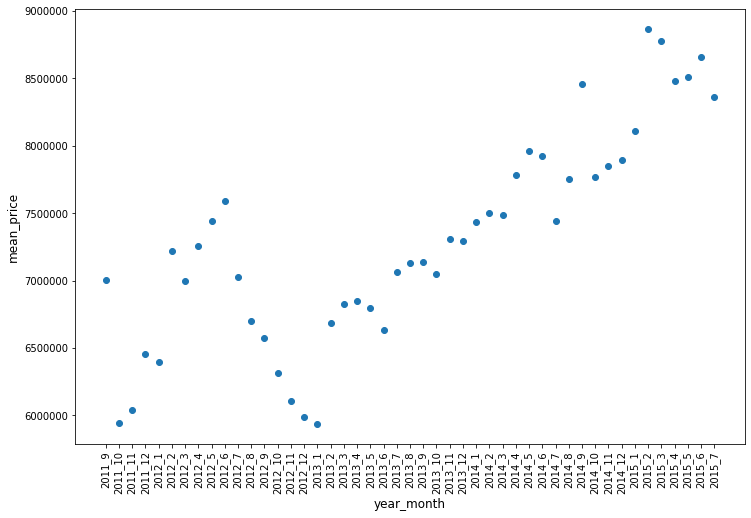

In [27]:
# Посмотрим еще раз на изменение средних 
plt.figure(figsize=(12,8))
plt.scatter(x='year_month', y='price', data=aggr_1)
plt.ylabel('mean_price', fontsize=12)
plt.xlabel('year_month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
# Поделим время на периоды
# 9 периодов взято с потолка однако определение границ периодов шло на основе средних на графике
test_df['period_flag'] = 9

test_df.loc[test_df['timestamp'] < pd.to_datetime('2012-03-01'), 'period_flag'] = 1
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2012-03-01')) &
               (test_df['timestamp'] <pd.to_datetime('2012-10-01')), 'period_flag'] = 2
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2012-10-01')) &
               (test_df['timestamp'] <pd.to_datetime('2013-03-01')), 'period_flag'] = 3
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2013-03-01')) &
               (test_df['timestamp'] <pd.to_datetime('2013-07-01')), 'period_flag'] = 4 
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2013-07-01')) &
               (test_df['timestamp'] <pd.to_datetime('2014-01-01')), 'period_flag'] = 5 
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2014-01-01')) &
               (test_df['timestamp'] <pd.to_datetime('2014-04-01')), 'period_flag'] = 6 
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2014-04-01')) &
               (test_df['timestamp'] <pd.to_datetime('2014-08-01')), 'period_flag'] = 7 
test_df.loc[(test_df['timestamp']>=pd.to_datetime('2014-08-01')) &
               (test_df['timestamp'] <pd.to_datetime('2015-02-01')), 'period_flag'] = 8 

In [40]:
# Проставим для опеределенных периодов свои predictions
# Выбор предиктов можно осуществлять различными способами например с помощью метамодели
def good_prediction(row):
    pred = 0
    if row.period_flag == 1:
        pred = (row.pred_price_2 + row.pred_price_3)/2
    elif row.period_flag in [2,3,5]:
        pred = row.pred_price
    elif row.period_flag in [4,8]:
        pred = (row.pred_price + row.pred_price_2)/2
    elif row.period_flag == 6:
        pred = row.pred_price_2
    elif row.period_flag == 7:
        pred = (row.pred_price + row.pred_price_3)/2
    elif row.period_flag == 9:
        pred = row.pred_price_3
    return pred

In [41]:
test_df['good_pred'] = test_df.apply(lambda x: good_prediction(x), axis=1)

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
answers = pd.read_csv('answer_2.csv')

In [45]:
answers = answers.merge(test_df[['id', 'pred_price','pred_price_2','pred_price_3', 'good_pred']], how = 'left', on= 'id' )

In [46]:
mean_squared_error(answers.price, answers.pred_price, squared=False)

2479852.749851442

In [47]:
mean_squared_error(answers.price, answers.pred_price_2, squared=False)

2505138.683683092

In [48]:
mean_squared_error(answers.price, answers.pred_price_3, squared=False)

2555946.810888363

In [52]:
# Давайте теперь попробуем взять пердсказание 2-х моделей и посмотрим на результат
answers['mean_of_2'] = (answers.pred_price + answers.pred_price_2)/2

In [51]:
# Результат для такой модели выше чем для одиночной, а значит грамотное объединение даст лучший результат
mean_squared_error(answers.price, answers.mean_of_2, squared=False)

2471497.7503038244

In [49]:
# Good prediction and answer
mean_squared_error(answers.price, answers.good_pred, squared=False)

2445724.339366691

In [236]:
# Максимум, который можно выбить за счет грамотного выбора предсказаний из 3-х моделей : 2 217 637
mean_squared_error(answers.price, answers.ideal_pred, squared=False)

2217637.2729825485